In [1]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

In [2]:
import h5py
import numpy as np
import scipy as sp
import scipy.stats as stats
import nibabel as nibabel
import pandas as pd
import nibabel.freesurfer.mghformat as mgh
import scipy.io
from itertools import combinations 


In [3]:
data_dir = '../../../data/'
local_dir = '../../../local_data/freesurfer/'

In [4]:
subjid = ['01', '02', '03', '04', '05', '06', '07', '08']
ROI_names = ['Unknown', 'Early', 'Midventral', 'Midlateral', 'Midparietal', 'Ventral', 'Lateral', 'Parietal']
n_repeats = 3

In [5]:
reliability = []
for sidx, sid in enumerate(subjid):
    
    sh_dir = '../../../local_data/freesurfer/subj' + sid + '/rh_split_half.mat'
    sh = scipy.io.loadmat(sh_dir)
    
    reliability.append(sh['mean'])

In [6]:
reliability

[array([[ 0.08296778,  0.15602   ,  0.16638921, ..., -0.00197444,
          0.00946118, -0.00438717]]),
 array([[0.01330934, 0.01319605, 0.01885947, ..., 0.0116634 , 0.01088442,
         0.00911053]]),
 array([[0.07221462, 0.07480367, 0.09221073, ..., 0.00876003, 0.00621437,
         0.01137557]]),
 array([[0.02645888, 0.02933486, 0.03641784, ..., 0.01105041, 0.00321272,
         0.01014825]]),
 array([[0.07173622, 0.07028862, 0.06334433, ..., 0.01576245, 0.01342667,
         0.02555644]]),
 array([[ 0.15084097,  0.14241943,  0.14715413, ..., -0.00667892,
          0.02098664, -0.00076862]]),
 array([[0.0392299 , 0.04579045, 0.07073367, ..., 0.00340336, 0.00745458,
         0.00408894]]),
 array([[0.1195646 , 0.09954478, 0.08262978, ..., 0.00937776, 0.00667692,
         0.01400038]])]

In [7]:
rh_streams = []
for sidx, sid in enumerate(subjid):
    mgh_file = mgh.load(data_dir+'nsddata/freesurfer/subj'+ sid +'/label/rh.streams.mgz')
    rh_streams.append(mgh_file.get_fdata()[:,0,0])

In [8]:
# let's organize by ROI 
sh_by_ROI = [[[] for j in range(len(ROI_names)-1)] for i in range(len(subjid))]

for sidx, sid in enumerate(subjid):  
    for roi_idx in range(len(ROI_names)-1):       
        sh_by_ROI[sidx][roi_idx]=reliability[sidx][:,rh_streams[sidx] == roi_idx+1]


In [9]:
print(len(sh_by_ROI))
print(len(sh_by_ROI[0]))

8
7


In [10]:
sh_means_by_subj_by_ROI = np.zeros((len(subjid),len(ROI_names)-1))
for sidx, sid in enumerate(subjid):  
    for roi_idx in range(len(ROI_names)-1):       
        sh_means_by_subj_by_ROI[sidx,roi_idx] = np.mean(sh_by_ROI[sidx][roi_idx])

In [11]:
np.mean(sh_means_by_subj_by_ROI,axis=0)

array([0.18755356, 0.18968718, 0.17920933, 0.16097065, 0.11075655,
       0.1191075 , 0.11530881])

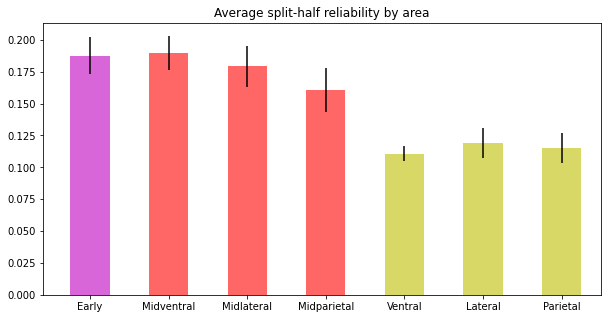

In [12]:
data = np.mean(sh_means_by_subj_by_ROI,axis=0)
error = stats.sem(sh_means_by_subj_by_ROI,axis=0)

plt.figure(figsize=(10, 5))
xlocations = np.array(range(data.shape[0]))+.1
width = 0.5
plt.bar(xlocations, data, 
        yerr=error, width=width, color = ['m','r','r','r','y','y','y'], alpha = .6)
plt.xticks(xlocations, ROI_names[1:])
plt.xlim(-0.5, xlocations[-1]+width)
plt.title("Average split-half reliability by area")
plt.gca().get_yaxis().tick_left()
plt.gca().get_xaxis().tick_bottom()
plt.show()

In [13]:
#proportion of total vox with nc > .1
thresh = .1
sh_prop_by_subj_by_ROI = np.zeros((len(subjid),len(ROI_names)-1))

for sidx, sid in enumerate(subjid):  
    for roi_idx in range(len(ROI_names)-1): 
        
        total_vox = len(sh_by_ROI[sidx][roi_idx][0])
        above_thresh = sum(sh_by_ROI[sidx][roi_idx][0]>thresh)
        
        sh_prop_by_subj_by_ROI[sidx][roi_idx] = above_thresh/total_vox

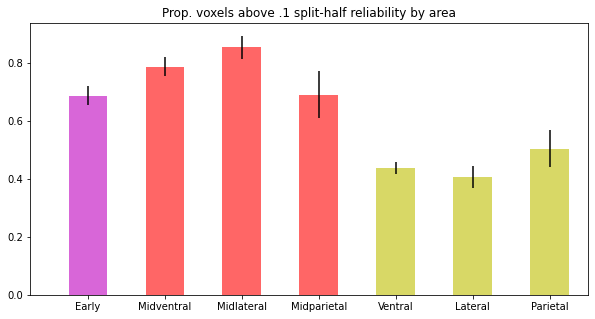

In [14]:
data = np.mean(sh_prop_by_subj_by_ROI,axis=0)
error = stats.sem(sh_prop_by_subj_by_ROI,axis=0)

plt.figure(figsize=(10, 5))
xlocations = np.array(range(data.shape[0]))+.25
width = 0.5
plt.bar(xlocations, data, 
        yerr=error, width=width, color = ['m','r','r','r','y','y','y'], alpha = .6)
plt.xticks(xlocations, ROI_names[1:])
plt.xlim(-0.5, xlocations[-1]+width)
plt.title("Prop. voxels above .1 split-half reliability by area")
plt.gca().get_yaxis().tick_left()
plt.gca().get_xaxis().tick_bottom()
plt.show()

In [15]:
error

array([0.0320133 , 0.03157351, 0.03905496, 0.08072153, 0.02068682,
       0.03768463, 0.06317346])

In [16]:
np.array(range(data.shape[0]))+.1

array([0.1, 1.1, 2.1, 3.1, 4.1, 5.1, 6.1])

In [17]:
data.shape

(7,)

In [18]:
len(sh_by_ROI[sidx][roi_idx][0])

7581

In [19]:
sum(sh_by_ROI[sidx][roi_idx][0]>.1)

2160

(array([1.700e+01, 4.950e+02, 2.381e+03, 4.275e+03, 2.864e+03, 1.243e+03,
        8.490e+02, 7.070e+02, 6.000e+02, 6.110e+02, 5.940e+02, 5.360e+02,
        5.150e+02, 4.920e+02, 3.940e+02, 2.600e+02, 2.490e+02, 1.710e+02,
        1.550e+02, 1.290e+02, 1.320e+02, 9.500e+01, 7.700e+01, 7.100e+01,
        7.400e+01, 5.900e+01, 5.300e+01, 5.100e+01, 3.900e+01, 4.500e+01,
        3.700e+01, 1.500e+01, 3.100e+01, 2.700e+01, 1.600e+01, 1.500e+01,
        1.300e+01, 4.000e+00, 6.000e+00, 6.000e+00, 4.000e+00, 5.000e+00,
        5.000e+00, 4.000e+00, 2.000e+00, 3.000e+00, 3.000e+00, 2.000e+00,
        1.000e+00, 2.000e+00]),
 array([-2.18753727e-02, -1.08783321e-02,  1.18708489e-04,  1.11157491e-02,
         2.21127897e-02,  3.31098303e-02,  4.41068708e-02,  5.51039114e-02,
         6.61009520e-02,  7.70979926e-02,  8.80950332e-02,  9.90920738e-02,
         1.10089114e-01,  1.21086155e-01,  1.32083196e-01,  1.43080236e-01,
         1.54077277e-01,  1.65074317e-01,  1.76071358e-01,  1.87068399e-

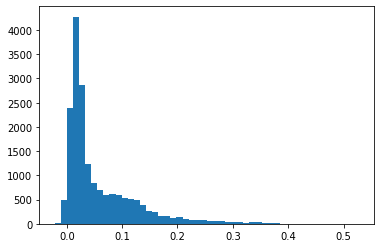

In [20]:
plt.hist(sh_by_ROI[sidx][5][0],bins=50)